<a href="https://colab.research.google.com/github/sandeep-sb/Fatal-Force-Major-Project/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upgrade Plotly

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 15.2 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import numpy as np

# Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data


In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration



*   What is the shape of the DataFrames?
*   How many rows and columns do they have?
*   What are the column names?
*   Are there any NaN values or duplicates?




In [9]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [10]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [13]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.12,47.25,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.89,45.49,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,-97.28,37.70,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.42,37.76,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,-104.69,40.38,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8025,NaN,2022-05-06,shot,sharp object,NaN,M,NaN,Rosamond,CA,False,attack,NaN,False,-118.19,34.86,True
7355,8013,NaN,2022-05-07,shot,unknown weapon,25.00,M,NaN,Hallandale Beach,FL,False,attack,Foot,False,-80.13,25.99,True
7356,8015,NaN,2022-05-07,shot,incendiary weapon,NaN,M,NaN,Raleigh,NC,False,attack,Not fleeing,False,-78.60,35.75,True
7357,8023,NaN,2022-05-07,shot,gun,NaN,M,NaN,Wenatchee,WA,False,attack,NaN,False,-120.31,47.42,True


# Data Cleaning - Check for Missing Values and Duplicates
<p>Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.</p>

In [17]:
# CHECK NaN VALUES
print(df_hh_income)
df_hh_income.isnull().any()

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]


Geographic Area    False
City               False
Median Income       True
dtype: bool

In [21]:
#  Replace nan with 0
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

# we can also substitute NaN with 0 by using df.fillna() method ----  df.fillna(0, inplace=True)

In [22]:
df_hh_income.isnull().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [23]:
df_pct_poverty.isnull().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [24]:
df_pct_completed_hs.isnull().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [25]:
df_share_race_city.isnull().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [26]:
df_fatalities.isnull().any()

id                         False
name                        True
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
longitude                   True
latitude                    True
is_geocoding_exact         False
dtype: bool

In [27]:
print(df_fatalities.armed.isnull().any().sum())
print(df_fatalities.race.isnull().any().sum())
print(df_fatalities.flee.isnull().any().sum())

1
1
1


In [29]:
# CHECK DUPLICATE ROWS
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
print(df_fatalities.duplicated().values.any())

False
False
False
False
False


# Chart the Poverty Rate in each US State
<p>Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate? Bar Plot</p>

In [30]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [32]:
df_pct_poverty['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [33]:
df_pct_poverty.poverty_rate.unique()
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

In [34]:
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
poverty

Geographic Area
MS   26.88
AZ   25.67
GA   23.78
NM   23.08
AR   22.96
LA   22.34
SC   22.16
WV   21.13
OK   20.66
AL   20.65
MO   20.11
KY   20.08
TX   19.92
TN   19.89
AK   19.85
NC   19.75
ID   18.24
DC   18.00
MI   17.90
FL   17.57
CA   17.12
ME   16.89
OR   16.52
MT   16.51
SD   16.03
IN   15.50
WA   15.02
OH   14.85
KS   14.76
VA   14.59
IL   13.88
VT   13.79
MN   13.75
HI   13.40
CO   13.36
NE   12.98
WI   12.86
NH   12.66
DE   12.56
PA   12.52
NV   12.47
IA   12.29
ND   12.16
UT   11.98
NY   11.67
RI   10.37
MD   10.31
WY    9.89
MA    9.59
CT    9.14
NJ    8.19
Name: poverty_rate, dtype: float64

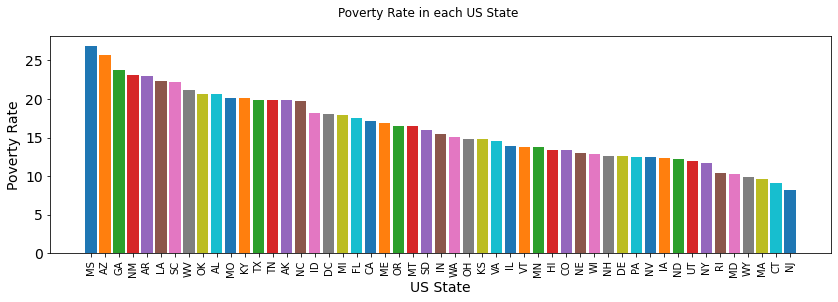

In [35]:
plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty.index[n], poverty[n])

plt.show()

# Chart the High School Graduation Rate by US State
<p>Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?</p>

In [37]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [38]:
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

# astype() function to convert column from string/int to float, you can apply this on a specific column or on an entire DataFrame

In [39]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)
graduation

Geographic Area
MA   92.40
WY   92.10
HI   91.67
UT   91.62
CT   91.59
ME   91.43
NJ   90.85
NH   90.71
NY   90.61
MT   90.49
WI   90.26
IA   90.11
CO   90.11
NE   89.99
VT   89.98
MN   89.47
DC   89.30
MI   89.21
PA   89.02
RI   88.82
DE   88.52
IL   88.48
MD   88.42
OH   88.34
OR   88.30
KS   88.23
WA   88.20
ND   87.82
SD   87.75
NV   87.72
IN   86.32
FL   85.74
ID   85.17
VA   84.88
AK   84.63
MO   83.52
NC   83.25
OK   82.91
KY   82.37
WV   82.35
CA   81.96
TN   81.63
NM   80.98
SC   80.85
AZ   80.47
AL   80.30
AR   79.95
LA   79.29
GA   79.01
MS   78.47
TX   75.69
Name: percent_completed_hs, dtype: float64

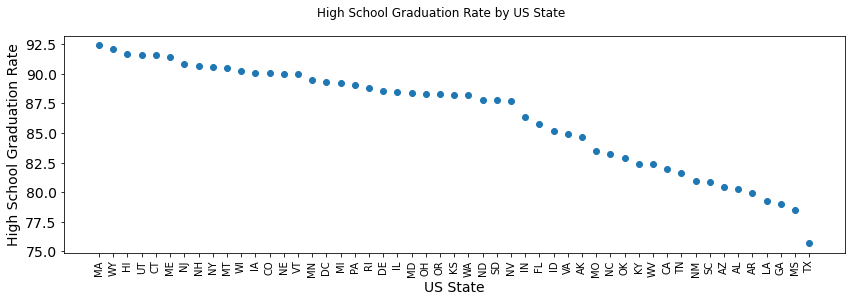

In [40]:
plt.figure(figsize=(14,4))
plt.suptitle('High School Graduation Rate by US State')
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.scatter(graduation.index, graduation)

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates
Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.

In [41]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
graduation_vs

Geographic Area
AK   84.63
AL   80.30
AR   79.95
AZ   80.47
CA   81.96
CO   90.11
CT   91.59
DC   89.30
DE   88.52
FL   85.74
GA   79.01
HI   91.67
IA   90.11
ID   85.17
IL   88.48
IN   86.32
KS   88.23
KY   82.37
LA   79.29
MA   92.40
MD   88.42
ME   91.43
MI   89.21
MN   89.47
MO   83.52
MS   78.47
MT   90.49
NC   83.25
ND   87.82
NE   89.99
NH   90.71
NJ   90.85
NM   80.98
NV   87.72
NY   90.61
OH   88.34
OK   82.91
OR   88.30
PA   89.02
RI   88.82
SC   80.85
SD   87.75
TN   81.63
TX   75.69
UT   91.62
VA   84.88
VT   89.98
WA   88.20
WI   90.26
WV   82.35
WY   92.10
Name: percent_completed_hs, dtype: float64

In [42]:
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
poverty_vs

Geographic Area
AK   19.85
AL   20.65
AR   22.96
AZ   25.67
CA   17.12
CO   13.36
CT    9.14
DC   18.00
DE   12.56
FL   17.57
GA   23.78
HI   13.40
IA   12.29
ID   18.24
IL   13.88
IN   15.50
KS   14.76
KY   20.08
LA   22.34
MA    9.59
MD   10.31
ME   16.89
MI   17.90
MN   13.75
MO   20.11
MS   26.88
MT   16.51
NC   19.75
ND   12.16
NE   12.98
NH   12.66
NJ    8.19
NM   23.08
NV   12.47
NY   11.67
OH   14.85
OK   20.66
OR   16.52
PA   12.52
RI   10.37
SC   22.16
SD   16.03
TN   19.89
TX   19.92
UT   11.98
VA   14.59
VT   13.79
WA   15.02
WI   12.86
WV   21.13
WY    9.89
Name: poverty_rate, dtype: float64

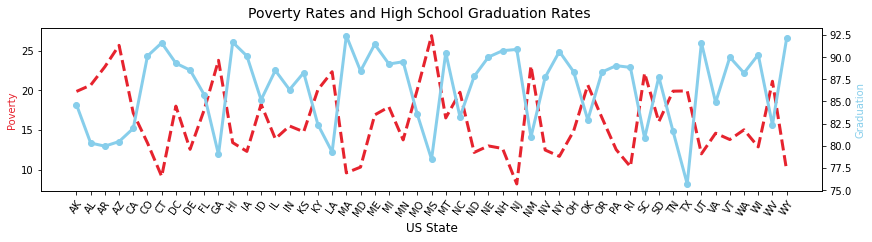

In [44]:
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color='#E6232E') 
ax2.set_ylabel('Graduation', color='skyblue') 
 
ax1.plot(poverty_vs.index, poverty_vs, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='skyblue', linewidth=3, marker='o')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State
Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [45]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [48]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')
df_share_race_city
# .to_numeric converts argument to a numeric type. errors=‘coerce’ means invalid parsing will be set as NaN.

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [47]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


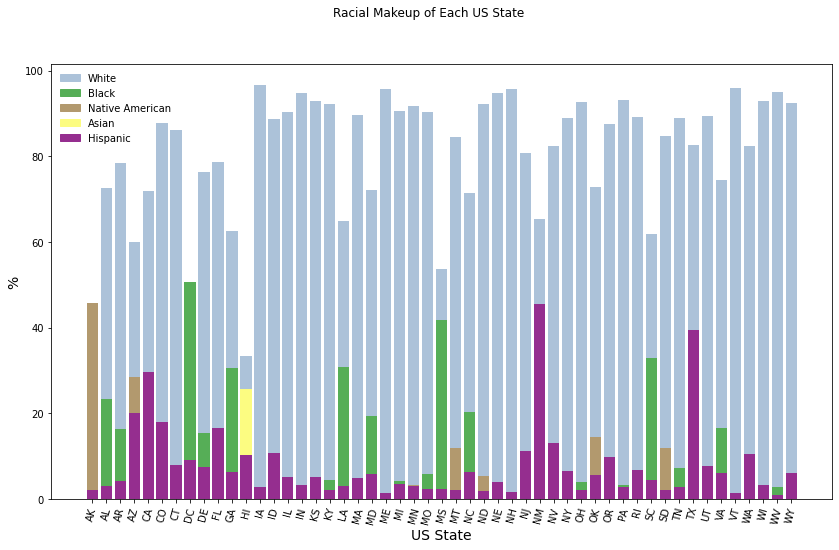

In [53]:
x_indexes = np.arange(len(racial))

color_list = list(colors._colors_full_map.values())
# colors_list = []
# for _ in range(5):
#     colors_list.append(random.choice(color_list))

plt.figure(figsize=(14,8))
plt.suptitle('Racial Makeup of Each US State')
plt.ylabel('%', fontsize=14)
plt.xlabel('US State', fontsize=14)

labels = []
for n in range(len(racial)):
    plt.bar(racial.index[n], racial['share_white'][n], color=color_list[0])
    plt.bar(racial.index[n], racial['share_black'][n], color=color_list[1])
    plt.bar(racial.index[n], racial['share_native_american'][n], color=color_list[2])
    plt.bar(racial.index[n], racial['share_asian'][n], color=color_list[10])
    plt.bar(racial.index[n], racial['share_hispanic'][n], color=color_list[9])
    labels.append(racial.index[n])

white_legend = mpatches.Patch(label='White', color=color_list[0])
black_legend = mpatches.Patch(label='Black', color=color_list[1])
native_american_legend = mpatches.Patch(label='Native American', color=color_list[2])
asian_legend = mpatches.Patch(label='Asian', color=color_list[10])
hispanic_legend = mpatches.Patch(label='Hispanic', color=color_list[9])

plt.legend(handles=[white_legend, black_legend, native_american_legend, asian_legend, hispanic_legend], loc='best', frameon=False)

plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=75)
plt.yticks(fontsize=10)

plt.show()